In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pandas_datareader import data
plt.style.use('ggplot')

In [2]:
dt = datetime(2017, 11, 12, 13, 12, 15)
dt

datetime.datetime(2017, 11, 12, 13, 12, 15)

In [3]:
print(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)

2017 11 12 13 12 15


In [4]:
cur = datetime.now()
cur

datetime.datetime(2022, 1, 11, 9, 13, 2, 334529)

### 시계열 데이터 정의
#### index가 'datetime' 형인 경우
#### 시계열 데이터의 indexing & slicing 사용
#### resample 시계열 데이터 집계함수 사용 가능

In [5]:
mydata = {'2020-11-12':[10,20,30],
         '2020-11-13':[40,50,60],
         '2020-11-14':[70,80,90],
         '2020-11-15':[100,120,130]}

In [6]:
mydata = {datetime(2020,11,12):[10, 20, 30],
         datetime(2020,11,13):[40, 50, 60],
         datetime(2020,11,14):[70, 80, 90],
         datetime(2020,11,15):[100, 120, 130]}

In [7]:
mydata = {'2020년11월12일':[10,20,30],
         '2020년11월13일':[40,50,60],
         '2020년11월14일':[70,80,90],
         '2020년11월15일':[100,120,130]}

In [8]:
df = pd.DataFrame(mydata)
df = df.T
df

,0,1,2
2020년11월12일,10,20,30
2020년11월13일,40,50,60
2020년11월14일,70,80,90
2020년11월15일,100,120,130


https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [9]:
df.index # 시계열 데이터 아님

Index(['2020년11월12일', '2020년11월13일', '2020년11월14일', '2020년11월15일'], dtype='object')

In [10]:
df.index = pd.to_datetime(df.index, format='%Y년%m월%d일')

In [11]:
df.index

DatetimeIndex(['2020-11-12', '2020-11-13', '2020-11-14', '2020-11-15'], dtype='datetime64[ns]', freq=None)

In [12]:
#!pip install pandas_datareader
# 각종 금융정보를 dataframe으로 제공해주는 라이브러리

#### 삼전 주가 읽어오기

In [13]:
sdf = data.get_data_yahoo('005930.KS', '2017-01-01')
sdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31468.947266
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,31800.201172
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31521.253906
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,30998.222656
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31556.115234
...,...,...,...,...,...,...
2022-01-04,79200.0,78300.0,78800.0,78700.0,12427416.0,78700.000000
2022-01-05,79000.0,76400.0,78800.0,77400.0,25470640.0,77400.000000
2022-01-06,77600.0,76600.0,76700.0,76900.0,12931954.0,76900.000000


In [14]:
sdf.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10'],
              dtype='datetime64[ns]', name='Date', length=1232, freq=None)

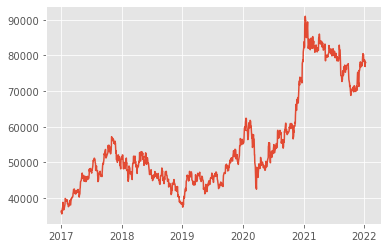

In [15]:
plt.plot(sdf['Close'])
plt.show()

In [17]:
data1 = [[1,2],[3,4],[5,8],[7,6],[9,12],[11,10],[13,16],[15,20]]
df = pd.DataFrame( data1, columns = ['A', 'B'] )
df.index=['2019-01-01','2019-02-01','2019-03-01','2019-04-01',
          '2019-05-01','2019-06-01','2019-07-01','2019-08-01']
df

,A,B
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,8
2019-04-01,7,6
2019-05-01,9,12
2019-06-01,11,10
2019-07-01,13,16
2019-08-01,15,20


#### 이동평균

In [19]:
df.rolling(window = 2).mean() #sum, max, min 등
#이틀간 데이터의 평균값을 이틀째 자리에 표시

,A,B
2019-01-01,NaN,NaN
2019-02-01,2.0,3.0
2019-03-01,4.0,6.0
2019-04-01,6.0,7.0
2019-05-01,8.0,9.0
2019-06-01,10.0,11.0
2019-07-01,12.0,13.0
2019-08-01,14.0,18.0


In [20]:
df.rolling(window = 3).mean()

,A,B
2019-01-01,NaN,NaN
2019-02-01,NaN,NaN
2019-03-01,3.0,4.666667
2019-04-01,5.0,6.000000
2019-05-01,7.0,8.666667
2019-06-01,9.0,9.333333
2019-07-01,11.0,12.666667
2019-08-01,13.0,15.333333


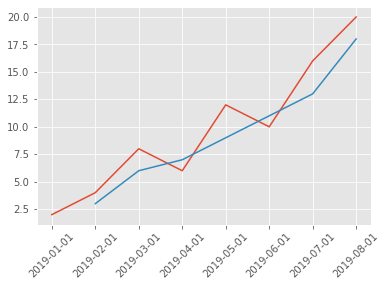

In [24]:
plt.xticks(rotation=45)
plt.plot(df.index, df['B'])
plt.plot( df.index, df.rolling(window=2).mean()['B'] )
plt.show()

In [27]:
sdf.rolling(window=20).mean()['Close']

Date
2017-01-02        NaN
2017-01-03        NaN
2017-01-04        NaN
2017-01-05        NaN
2017-01-06        NaN
               ...   
2022-01-04    78235.0
2022-01-05    78290.0
2022-01-06    78265.0
2022-01-07    78310.0
2022-01-10    78300.0
Name: Close, Length: 1232, dtype: float64

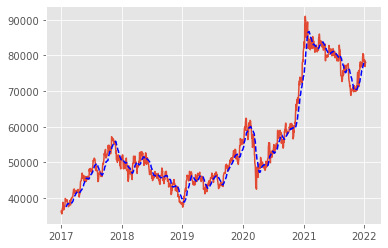

In [30]:
plt.plot(sdf.index, sdf['Close'])
plt.plot(sdf.index, sdf.rolling(window=20).mean()['Close'], 'b--')
plt.show()

#### 시계열 데이터에 적용되는 인덱싱 & 슬라이싱

In [33]:
#sdf['2017']
#인덱스가 object형이면 적용 불가
sdf.loc['2017']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31468.947266
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,31800.201172
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31521.253906
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,30998.222656
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31556.115234
...,...,...,...,...,...,...
2017-12-21,51060.0,49100.0,51000.0,49140.0,15624300.0,43223.753906
2017-12-22,49960.0,49240.0,49400.0,49700.0,11199650.0,43716.335938
2017-12-26,50100.0,48200.0,49760.0,48200.0,16039850.0,42396.921875


In [34]:
sdf.loc['2017-07']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-03,47780.0,47120.0,47500.0,47220.0,6805550.0,41422.394531
2017-07-04,47400.0,46900.0,47160.0,47000.0,7961000.0,41229.406250
2017-07-05,47680.0,46780.0,46820.0,47580.0,10640250.0,41738.195312
2017-07-06,48100.0,47720.0,48000.0,48060.0,10923050.0,42159.265625
2017-07-07,48120.0,47620.0,47740.0,47860.0,8131900.0,41983.816406
2017-07-10,48900.0,48320.0,48500.0,48660.0,10792750.0,42685.593750
2017-07-11,49000.0,48280.0,48640.0,49000.0,9717800.0,42983.855469
2017-07-12,50000.0,48840.0,49000.0,49880.0,9486150.0,43755.804688
2017-07-13,50940.0,50040.0,50080.0,50560.0,16034150.0,44352.324219


In [35]:
sdf.loc['2017':'2019']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31468.947266
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,31800.201172
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31521.253906
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,30998.222656
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31556.115234
...,...,...,...,...,...,...
2019-12-23,56400.0,55100.0,56100.0,55500.0,9839252.0,52006.601562
2019-12-24,55700.0,54800.0,55600.0,55000.0,11868463.0,51538.074219
2019-12-26,55400.0,54400.0,54700.0,55400.0,9645034.0,51912.898438


In [36]:
sdf.loc['2017-07':'2017-12']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-03,47780.0,47120.0,47500.0,47220.0,6805550.0,41422.394531
2017-07-04,47400.0,46900.0,47160.0,47000.0,7961000.0,41229.406250
2017-07-05,47680.0,46780.0,46820.0,47580.0,10640250.0,41738.195312
2017-07-06,48100.0,47720.0,48000.0,48060.0,10923050.0,42159.265625
2017-07-07,48120.0,47620.0,47740.0,47860.0,8131900.0,41983.816406
...,...,...,...,...,...,...
2017-12-21,51060.0,49100.0,51000.0,49140.0,15624300.0,43223.753906
2017-12-22,49960.0,49240.0,49400.0,49700.0,11199650.0,43716.335938
2017-12-26,50100.0,48200.0,49760.0,48200.0,16039850.0,42396.921875


In [37]:
sdf.loc['2017-07-01':'2017-07-15']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-03,47780.0,47120.0,47500.0,47220.0,6805550.0,41422.394531
2017-07-04,47400.0,46900.0,47160.0,47000.0,7961000.0,41229.406250
2017-07-05,47680.0,46780.0,46820.0,47580.0,10640250.0,41738.195312
2017-07-06,48100.0,47720.0,48000.0,48060.0,10923050.0,42159.265625
2017-07-07,48120.0,47620.0,47740.0,47860.0,8131900.0,41983.816406
2017-07-10,48900.0,48320.0,48500.0,48660.0,10792750.0,42685.593750
2017-07-11,49000.0,48280.0,48640.0,49000.0,9717800.0,42983.855469
2017-07-12,50000.0,48840.0,49000.0,49880.0,9486150.0,43755.804688
2017-07-13,50940.0,50040.0,50080.0,50560.0,16034150.0,44352.324219


In [40]:
sdf['year'] = sdf.index.year

In [42]:
sdf.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12,  1,  1,  1,  1,  1],
           dtype='int64', name='Date', length=1232)

#### 년도별 평균 : 시계열 데이터의 통계(집계)

DataFrameGroupBy : sum, mean, max, min, agg

In [45]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1232 entries, 2017-01-02 to 2022-01-10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1232 non-null   float64
 1   Low        1232 non-null   float64
 2   Open       1232 non-null   float64
 3   Close      1232 non-null   float64
 4   Volume     1232 non-null   float64
 5   Adj Close  1232 non-null   float64
 6   year       1232 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 109.3 KB


In [44]:
sdf.groupby('year').mean()

,High,Low,Open,Close,Volume,Adj Close
year,,,,,,
2017,46790.207469,45965.311203,46363.485477,46377.178423,1.144929e+07,40634.909678
2018,47351.270492,46341.762295,46867.786885,46830.122951,1.255331e+07,42019.000528
2019,46989.024390,46122.154472,46563.414634,46583.333333,1.089653e+07,43202.914952
2020,57828.225806,56498.588710,57144.758065,57167.741935,2.174733e+07,54529.032400
2021,79912.500000,78567.741935,79257.661290,79155.645161,1.878421e+07,78608.818359
2022,78460.000000,77160.000000,78100.000000,77860.000000,1.518824e+07,77860.000000


In [47]:
sdf.groupby(sdf.index.year).mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017,46790.207469,45965.311203,46363.485477,46377.178423,1.144929e+07,40634.909678,2017
2018,47351.270492,46341.762295,46867.786885,46830.122951,1.255331e+07,42019.000528,2018
2019,46989.024390,46122.154472,46563.414634,46583.333333,1.089653e+07,43202.914952,2019
2020,57828.225806,56498.588710,57144.758065,57167.741935,2.174733e+07,54529.032400,2020
2021,79912.500000,78567.741935,79257.661290,79155.645161,1.878421e+07,78608.818359,2021
2022,78460.000000,77160.000000,78100.000000,77860.000000,1.518824e+07,77860.000000,2022


In [49]:
sdf.groupby(sdf.index.month).mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
1,56369.082569,54898.440367,55567.064220,55609.541284,1.864352e+07,52057.655480,2019.119266
2,55343.763441,54163.978495,54731.182796,54700.537634,1.659130e+07,50955.476689,2018.978495
3,54369.345794,53159.252336,53739.906542,53767.476636,1.790628e+07,50094.770006,2019.009346
4,54984.857143,54012.857143,54556.190476,54531.142857,1.434873e+07,51097.577232,2019.028571
5,54158.775510,53167.142857,53701.224490,53610.306122,1.609786e+07,50071.225088,2018.989796
6,55800.582524,54841.650485,55315.339806,55335.533981,1.484334e+07,51868.212948,2019.048544
7,55646.936937,54807.387387,55270.450450,55193.333333,1.201561e+07,51899.673881,2019.027027
8,54537.924528,53514.622642,54082.264151,53957.358491,1.480186e+07,50669.837891,2018.962264
9,56231.458333,55314.791667,55772.500000,55807.083333,1.371283e+07,52464.223185,2019.020833


In [50]:
sdf.groupby([sdf.index.year, sdf.index.month]).mean() #연도 & 웗별

High           Low          Open         Close  \
Date Date                                                           
2017 1     37826.000000  37079.000000  37340.000000  37486.000000   
     2     38912.000000  38276.000000  38578.000000  38571.000000   
     3     41447.272727  40740.909091  40890.000000  41166.363636   
     4     42261.000000  41549.000000  41910.000000  41959.000000   
     5     46040.000000  45188.421053  45590.526316  45550.526316   
...                 ...           ...           ...           ...   
2021 9     76884.210526  75800.000000  76526.315789  76305.263158   
     10    71373.684211  70157.894737  70852.631579  70563.157895   
     11    72386.363636  71054.545455  71863.636364  71536.363636   
     12    78272.727273  76945.454545  77522.727273  77809.090909   
2022 1     78460.000000  77160.000000  78100.000000  77860.000000   

                 Volume     Adj Close  year  
Date Date                                    
2017 1     1.102530e+07  32677.144238  2017  
     2     1.192612e+07  33622.954688  2017  
     3     1.193883e+07  35896.455611  2017  
     4     1.191310e+07  36699.303906  2017  
     5     1.358061e+07  39840.622738  2017  
...                 ...           ...   ...  
2021 9     1.480175e+07  75981.143914  2021  
     10    1.579967e+07  70563.157895  2021  
     11    1.423263e+07  71536.363636  2021  
     12    1.563206e+07  77809.090909  2021  
2022 1     1.518824e+07  77860.000000  2022  

[61 rows x 7 columns]

In [41]:
sdf

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31468.947266,2017
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,31800.201172,2017
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31521.253906,2017
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,30998.222656,2017
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31556.115234,2017
...,...,...,...,...,...,...,...
2022-01-04,79200.0,78300.0,78800.0,78700.0,12427416.0,78700.000000,2022
2022-01-05,79000.0,76400.0,78800.0,77400.0,25470640.0,77400.000000,2022
2022-01-06,77600.0,76600.0,76700.0,76900.0,12931954.0,76900.000000,2022


#### resample : 시계열 데이터 전용 집계함수

DatetimeIndexResampler : sum, mean, max, min

In [52]:
sdf.resample(rule='A').mean() # year end frequency (A, Y)

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-12-31,46790.207469,45965.311203,46363.485477,46377.178423,1.144929e+07,40634.909678,2017
2018-12-31,47351.270492,46341.762295,46867.786885,46830.122951,1.255331e+07,42019.000528,2018
2019-12-31,46989.024390,46122.154472,46563.414634,46583.333333,1.089653e+07,43202.914952,2019
2020-12-31,57828.225806,56498.588710,57144.758065,57167.741935,2.174733e+07,54529.032400,2020
2021-12-31,79912.500000,78567.741935,79257.661290,79155.645161,1.878421e+07,78608.818359,2021
2022-12-31,78460.000000,77160.000000,78100.000000,77860.000000,1.518824e+07,77860.000000,2022


In [53]:
sdf.resample(rule='M').mean() # month end frequency (M)

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-31,37826.000000,37079.000000,37340.000000,37486.000000,1.102530e+07,32677.144238,2017
2017-02-28,38912.000000,38276.000000,38578.000000,38571.000000,1.192612e+07,33622.954688,2017
2017-03-31,41447.272727,40740.909091,40890.000000,41166.363636,1.193883e+07,35896.455611,2017
2017-04-30,42261.000000,41549.000000,41910.000000,41959.000000,1.191310e+07,36699.303906,2017
2017-05-31,46040.000000,45188.421053,45590.526316,45550.526316,1.358061e+07,39840.622738,2017
...,...,...,...,...,...,...,...
2021-09-30,76884.210526,75800.000000,76526.315789,76305.263158,1.480175e+07,75981.143914,2021
2021-10-31,71373.684211,70157.894737,70852.631579,70563.157895,1.579967e+07,70563.157895,2021
2021-11-30,72386.363636,71054.545455,71863.636364,71536.363636,1.423263e+07,71536.363636,2021


In [54]:
sdf.resample(rule='W').mean() # weekly frequency (W) = 일요일부터 월요일(W-SUN)

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-08,36376.0,35916.0,36200.0,36100.0,7965680.00,31468.948047,2017.0
2017-01-15,38116.0,37300.0,37500.0,37800.0,12387290.00,32950.862500,2017.0
2017-01-22,37624.0,36684.0,37064.0,37048.0,10448300.00,32295.332813,2017.0
2017-01-29,39010.0,38155.0,38270.0,38880.0,12126875.00,33892.314453,2017.0
2017-02-05,39680.0,39220.0,39610.0,39350.0,14389562.50,34302.020508,2017.0
...,...,...,...,...,...,...,...
2021-12-19,77920.0,76640.0,77080.0,77440.0,12140991.20,77440.000000,2021.0
2021-12-26,79260.0,78520.0,78880.0,79000.0,13655888.60,79000.000000,2021.0
2022-01-02,80175.0,79025.0,79975.0,79400.0,15760297.00,79400.000000,2021.0


In [55]:
sdf.resample(rule='Q').mean() # quarter end frequency (A, Y)

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-03-31,39461.290323,38764.516129,38999.032258,39141.935484,1.164004e+07,34124.580677,2017
2017-06-30,45070.666667,44335.000000,44668.333333,44711.666667,1.212670e+07,39111.012695,2017
2017-09-30,49144.444444,48332.380952,48771.428571,48768.571429,1.100376e+07,42784.714162,2017
2017-12-31,54098.214286,53021.428571,53624.285714,53481.785714,1.101350e+07,47056.990653,2017
2018-03-31,49731.475410,48516.721311,49162.950820,49073.114754,1.523360e+07,43563.935259,2018
2018-06-30,50477.333333,49385.333333,50009.166667,49909.000000,1.393414e+07,44630.029297,2018
2018-09-30,46469.672131,45650.000000,46051.639344,46078.688525,9.944799e+06,41512.126921,2018
2018-12-31,42851.612903,41937.096774,42372.580645,42383.064516,1.114639e+07,38470.880292,2018
2019-03-31,44361.016949,43431.355932,43903.389831,43960.169492,1.220284e+07,40274.118181,2019
